In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
%matplotlib inline

DATA_DIR = '.'

# Load Data

In [24]:
data = pd.DataFrame()

In [25]:
total_data = [500, 1000, 2500, 5000, 7500, 10981]

for x in total_data:
    data = pd.concat([
     data,   
     pd.read_csv('{}/final_prosa_yelp_XLM_R_result_combined_{}.csv'.format(DATA_DIR, x))
    ])

print(data.shape)
data.head()

(96, 7)


,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
0,A,500,0.25,0,0.335484,1.000000,0.504854
1,B,500,0.25,0,0.484829,0.245192,0.566667
2,C,500,0.25,125,0.335484,1.000000,0.504854
3,C,500,0.50,250,0.335484,1.000000,0.504854
4,C,500,0.75,375,0.340904,1.000000,0.506083


# Plot F1 By Total Data for each Type

In [26]:
# data.loc[(data['tipe'] == 'A') | (data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'A') | (data['tipe'] == 'B')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'A'), 'foreign_mult'] = data[(data['tipe'] == 'A')].foreign_mult.apply(lambda x: 0)
data.loc[(data['tipe'] == 'B'), 'foreign_mult'] = data[(data['tipe'] == 'B')].foreign_mult.apply(lambda x: -1)

In [27]:
data = data.sort_values(by=['total_data', 'foreign_mult'])
data.head(20)

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
1,B,500,-1.00,0,0.484829,0.245192,0.566667
0,A,500,0.00,0,0.335484,1.000000,0.504854
2,C,500,0.25,125,0.335484,1.000000,0.504854
3,C,500,0.50,250,0.335484,1.000000,0.504854
4,C,500,0.75,375,0.340904,1.000000,0.506083
5,C,500,1.00,500,0.340904,1.000000,0.506083
6,C,500,1.50,750,0.340904,1.000000,0.506083
7,C,500,2.00,1000,0.335484,1.000000,0.504854
8,C,500,3.00,1500,0.335484,1.000000,0.504854
9,C,500,4.00,2000,0.340904,1.000000,0.506083


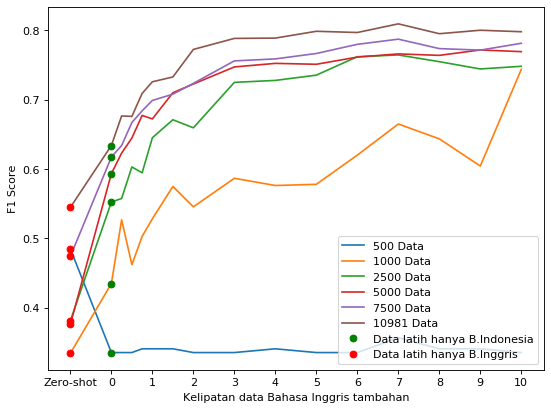

In [28]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 10981]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].max_f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['tipe'] == 'A' )].foreign_mult.values,
data[(data['tipe'] == 'A')].max_f1.values,
'go',
label='Data latih hanya B.Indonesia'.format(x))

plt.plot(data[(data['tipe'] == 'B' )].foreign_mult.values,
data[(data['tipe'] == 'B')].max_f1.values,
'ro',
label='Data latih hanya B.Inggris'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Kelipatan data Bahasa Inggris tambahan')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()

# Calculate gains

# Calculate difference A&B

In [7]:
total_data = [500, 1000, 2500, 5000, 7500, 10981]
diff = 0
for x in total_data:
    cur_diff = data[(data['total_data'] == x) & (data['tipe'] == 'A')].max_f1.values[0] - data[(data['total_data'] == x) & (data['tipe'] == 'B')].max_f1.values[0]
    print("Data {} diff: {}".format(x, cur_diff))
    diff += cur_diff
    
print(diff)
print("Avg: ", diff/len(total_data))

Data 500 diff: -0.14934528155733007
Data 1000 diff: 0.10052539250508319
Data 2500 diff: 0.1711961060696044
Data 5000 diff: 0.2171799519408411
Data 7500 diff: 0.1431804025051649
Data 10981 diff: 0.08915689371933999
0.5718934651827035
Avg:  0.09531557753045057


# Calculate highest gain

In [39]:
total_data = [500, 1000, 2500, 5000, 7500, 10981]
gains = 0
gains_list = []
for x in total_data:
    cur_gains = max(data[(data['total_data'] == x)].max_f1.values) - data[(data['total_data'] == x) & (data['tipe'] == 'A')].max_f1.values[0]
    gains += cur_gains
    print("Data {} diff: {}".format(x, cur_gains))
    gains_list.append(cur_gains)
    
print(gains)
print("Avg: ", gains/len(total_data))

Data 500 diff: 0.14934528155733007
Data 1000 diff: 0.30894093117476595
Data 2500 diff: 0.2119319832678883
Data 5000 diff: 0.17818266144087458
Data 7500 diff: 0.16994625880634384
Data 10981 diff: 0.17538678081176717
1.1937338970589702
Avg:  0.19895564950982836


In [40]:
total_data[5] = 10000
df_gains = pd.DataFrame()
df_gains['data'] = total_data
df_gains['gain'] = gains_list
df_gains.to_csv('gains.csv', index=False)
df_gains.head(10)

,data,gain
0,500,0.149345
1,1000,0.308941
2,2500,0.211932
3,5000,0.178183
4,7500,0.169946
5,10000,0.175387


In [10]:
max(data.max_f1.values)

0.8093814506370559

In [12]:
data[(data['total_data'] == 10981)]

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision
1,B,10981,-1.00,0,0.544838,0.956731,0.563739
0,A,10981,0.00,0,0.633995,0.399038,0.838384
2,C,10981,0.25,2745,0.676617,0.456731,0.879630
3,C,10981,0.50,5490,0.675938,0.466346,0.858407
4,C,10981,0.75,8235,0.709066,0.514423,0.884298
5,C,10981,1.00,10981,0.725861,0.543269,0.889764
6,C,10981,1.50,16471,0.732797,0.567308,0.874074
7,C,10981,2.00,21962,0.772496,0.634615,0.891892
8,C,10981,3.00,32943,0.788390,0.668269,0.891026
9,C,10981,4.00,43924,0.788854,0.677885,0.881250


# Plot all 9 experiment (by total data) side by side

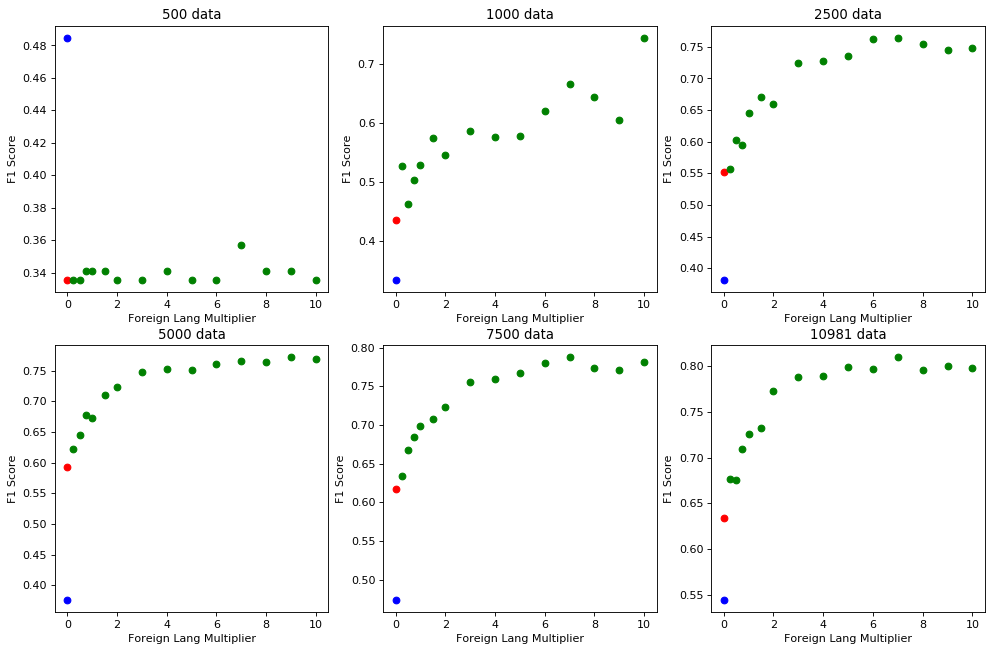

In [11]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
count_plot = 0
for x in total_data:
    count_plot += 1
    plt.subplot(3, 3, count_plot)
    final_result = data[data['total_data'] == x]
    
    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'A'].max_f1.values), 
             final_result[final_result['tipe'] == 'A'].max_f1.values, 'ro', label='A')

    plt.plot(np.zeros_like(final_result[final_result['tipe'] == 'B'].max_f1.values), 
             final_result[final_result['tipe'] == 'B'].max_f1.values, 'bo', label='B')

    plt.plot(final_result[final_result['tipe'] == 'C'].foreign_mult.values, 
             final_result[final_result['tipe'] == 'C'].max_f1.values, 'go', label='C')

#     plt.legend(loc="lower right")
    plt.xlabel('Foreign Lang Multiplier')
    plt.ylabel('F1 Score')
    plt.title('{} data'.format(x))

#     plt.figtext(.7, .4, "diff = {:.5f}".format(
#         final_result[final_result['tipe'] == 'C'].f1.values[0]
#         -
#         final_result[final_result['tipe'] == 'A'].f1.values[0]))

plt.show()